In [1]:
import matplotlib.pyplot as plt

import numpy as np
import os
from ctd.comparison.analysis.tt.tt import Analysis_TT 
from ctd.comparison.analysis.dt.dt import Analysis_DT
# Import pca
import dotenv
from ctd.comparison.comparison import Comparison

dotenv.load_dotenv(dotenv.find_dotenv())

True

In [2]:

HOME_DIR = os.environ['HOME_DIR']
print(HOME_DIR)

pathTT = HOME_DIR + 'content/trained_models/task-trained/20240328_NBFF_GRU_Final/n=3 max_epochs=1500 seed=0/'
pathGRU = pathTT + '20240328_GRU_RNN_DT_Final/'
pathVanilla = pathTT + '20240401_VanillaRNN_DT_Final/'
pathNODE = pathTT + '20240401_NODE_DT_Final/'
pathLFADS = pathTT + '20240402_NBFF_LFADS_DT_WDecay_Sweep2/gen_model=GRU_RNN prefix=20240328_NBFF_GRU_Final seed=0 max_epochs=1500 weight_decay=1e-05/'

an_TT = Analysis_TT(run_name = "TT", filepath = pathTT)
an_TT.plot_scree(max_pcs= 20)

an_GRU = Analysis_DT(run_name = "GRU", filepath = pathGRU, model_type = "SAE")
an_Vanilla = Analysis_DT(run_name = "Vanilla", filepath = pathVanilla, model_type = "SAE")
an_NODE = Analysis_DT(run_name = "NODE", filepath = pathNODE, model_type = "SAE")
an_LFADS = Analysis_DT(run_name = "LFADS", filepath = pathLFADS, model_type = "LFADS")

path_GRU_Sweep = pathTT + "20240402_NBFF_SAE_GRU_RNN_DT_Seed2/"
subfolders_GRU = [f.path for f in os.scandir(path_GRU_Sweep) if f.is_dir()]

path_Vanilla_Sweep = pathTT + "20240402_NBFF_SAE_VanillaRNN_DT_Seed2/"
subfolders_Vanilla = [f.path for f in os.scandir(path_Vanilla_Sweep) if f.is_dir()]

path_NODE_Sweep = pathTT + "20240403_NBFF_NODE_DT_SeedSweep2/"
subfolders_NODE = [f.path for f in os.scandir(path_NODE_Sweep) if f.is_dir()]

path_LFADS_Sweep = pathTT + "20240403_NBFF_LFADS_DT_SeedSweep2/"
subfolders_LFADS = [f.path for f in os.scandir(path_LFADS_Sweep) if f.is_dir()]

/home/csverst/Github/CtDBenchmark/


In [ ]:
comparison = Comparison(comparison_tag="Figure1")
comparison.load_analysis(an_TT, reference_analysis=True, group = "TT")
comparison.load_analysis(an_GRU, group = "GRU")
comparison.load_analysis(an_Vanilla, group = "Vanilla")
# comparison.load_analysis(an_NODE, group = "NODE")
comparison.load_analysis(an_LFADS, group = "LFADS")

for subfolder in subfolders_GRU:
    subfolder = subfolder + "/"
    analysis_temp = Analysis_DT(run_name = "GRU", filepath = subfolder, model_type = "SAE")
    comparison.load_analysis(analysis_temp, group = "GRU")

for subfolder in subfolders_Vanilla:
    
    subfolder = subfolder + "/"
    analysis_temp = Analysis_DT(run_name = "Vanilla", filepath = subfolder, model_type = "SAE")
    comparison.load_analysis(analysis_temp, group = "Vanilla")

for subfolder in subfolders_NODE:
    
    subfolder = subfolder + "/"
    analysis_temp = Analysis_DT(run_name = "NODE", filepath = subfolder, model_type = "SAE")
    comparison.load_analysis(analysis_temp, group = "NODE")

for subfolder in subfolders_LFADS:
        
        subfolder = subfolder + "/"
        analysis_temp = Analysis_DT(run_name = "LFADS", filepath = subfolder, model_type = "LFADS")
        comparison.load_analysis(analysis_temp, group = "LFADS")

comparison.regroup()

Working on 1 of 44
Performance R2s for GRU is [0.95579327 0.95231408 0.95122332]
Working on 2 of 44
Performance R2s for GRU is [0.95260218 0.95187869 0.93798418]
Working on 3 of 44
Performance R2s for GRU is [0.95585656 0.94933951 0.94177798]
Working on 4 of 44
Performance R2s for GRU is [0.95496608 0.9492354  0.95191172]
Working on 5 of 44
Performance R2s for GRU is [0.95956969 0.95538552 0.94534614]
Working on 6 of 44
Performance R2s for GRU is [0.95814048 0.95304742 0.95430153]
Working on 7 of 44
Performance R2s for GRU is [0.95624389 0.95530478 0.94983007]
Working on 8 of 44
Performance R2s for GRU is [0.95609804 0.94883711 0.94431511]
Working on 9 of 44
Performance R2s for GRU is [0.95473249 0.94713636 0.94490595]
Working on 10 of 44
Performance R2s for GRU is [0.95479613 0.94829554 0.94619188]
Working on 11 of 44
Performance R2s for GRU is [0.96078326 0.94578806 0.94118374]
Working on 12 of 44
Performance R2s for LFADS is [0.90329935 0.92295719 0.90696361]
Working on 13 of 44
Per

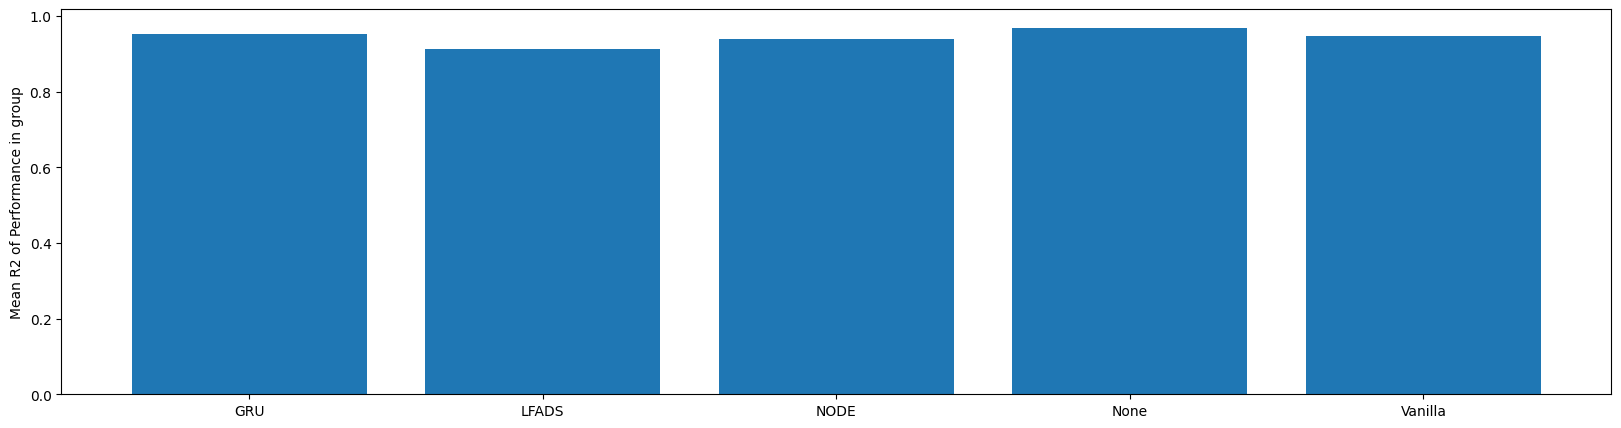

In [ ]:
comparison.compare_performance()
#comparison.compare_state_rate_r2()

In [ ]:
# sims = comparison.compare_dynamics_DSA()


In [ ]:
# Take upper triangle of sims
# sims = np.triu(sims, k=0)
# sims = sims.flatten()
# self_sim = sims[0]
# sims = sims[1:]
# fig = plt.figure()
# plt.bar(range(len(sims)), sims)
# plt.title("Dynamical Similarity")
# plt.xlabel("Model")
# plt.ylabel("Similarity")
# plt.xticks(range(len(sims)), ["GRU", "Vanilla", "NODE"])    

comparison.compare_to_reference_affine